# **Preprocesamiento y Visualizacion**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datos_GDC/ModeloRFMBrilla_BaseRFM.csv')
df['Identificacion'] = df['Identificacion'].astype(int)
df = df.drop('#',axis=1)

In [3]:
df.head()

,Identificacion,Recency,Frequency,Monetary
0,1000249113,40,1,4550001
1,1001866958,4,1,4256000
2,10002788,79,1,2000000
3,1001830554,4,1,2695000
4,1001780906,3,2,7913737


In [4]:
df['Frequency'].value_counts()

1     171787
2      93273
3      51872
4      29712
5      17279
6      10427
7       6308
8       3947
9       2489
10      1555
11       956
12       685
13       467
14       255
15       196
16       137
17        97
18        55
19        51
20        35
21        25
22        17
24        12
25        10
23         9
26         7
27         3
31         3
28         3
29         2
44         2
32         2
36         2
43         1
74         1
33         1
34         1
46         1
38         1
Name: Frequency, dtype: int64

In [5]:
df['Recency'].value_counts().keys() 

Int64Index([ 2,  0,  5,  1,  3, 10,  8,  6,  4, 11,  9,  7, 33, 29, 34, 14, 28,
            12, 32, 30, 35, 17, 16, 27, 15, 13, 36, 38, 31, 37, 18, 19, 26, 39,
            41, 40, 47, 44, 45, 42, 48, 43, 53, 58, 69, 59, 49, 54, 70, 57, 46,
            62, 74, 60, 65, 55, 68, 20, 67, 50, 56, 52, 77, 82, 78, 80, 66, 73,
            61, 71, 79, 83, 51, 72, 76, 84, 81, 63, 64, 75, 21, 85, 86, 22, 23,
            24, 87, 25],
           dtype='int64')

In [6]:
df = df[df['Recency'] <= 49]

In [7]:
df

,Identificacion,Recency,Frequency,Monetary
0,1000249113,40,1,4550001
1,1001866958,4,1,4256000
3,1001830554,4,1,2695000
4,1001780906,3,2,7913737
5,1000398945,5,1,2070000
...,...,...,...,...
391679,94446301,7,3,6057150
391680,9650668,41,1,1470502
391682,98341215,33,1,1249000
391684,98763614,5,2,6360000


In [8]:
def rfm_scoring(df):

  df = df.copy()

  # Se itera por las columnas Recency y Monetary, y crea bins divididos en quantiles.
  for cols in ['Recency','Monetary']:
    df[f'{cols}_bins'] = pd.qcut(df[cols],5)
    
    sorted_bins = sorted(df[f'{cols}_bins'].value_counts().keys())
    # Dependiendo de en cual intervalo (bin) se encuentra, lo clasifica de 5 a 1.
    if cols == 'Recency':
      r_score = []
      for j in df[cols]:
        counter = 5
        for v in sorted_bins:
          if j in v:
            break
          else:
            counter -= 1
        r_score.append(counter)
    # Dependiendo de en cual intervalo (bin) se encuentra, lo clasifica de 1 a 5.
    else:
      r_score = []
      for j in df[cols]:
        counter = 0
        for v in sorted_bins:
          counter += 1
          if j in v:
            break
        r_score.append(counter)
        
    df[f'{cols}-Score'] = r_score
  # Esta clasificacion es manual, y se clasifica de 1 a 3.
  freq_score = []
  for i in df['Frequency']:
    if i in [1,2,3]:
      freq_score.append(i)
    elif i in [4,5]:
      freq_score.append(4)
    elif i >= 6:
      freq_score.append(5)
      
  df['Frequency-Score'] = freq_score

  df = df.drop(['Recency_bins','Monetary_bins'],axis=1)
    
  return df

In [9]:
def modelo1(df):

  df = df.copy()

  # Se itera por las columnas Recency y Monetary, y crea bins divididos en quantiles.
  for cols in ['Recency','Monetary']:
    df[f'{cols}_bins'] = pd.qcut(df[cols],5)
    
    sorted_bins = sorted(df[f'{cols}_bins'].value_counts().keys())
    # Dependiendo de en cual intervalo (bin) se encuentra, lo clasifica de 5 a 1.
    if cols == 'Recency':
      r_score = []
      for j in df[cols]:
        counter = 5
        for v in sorted_bins:
          if j in v:
            break
          else:
            counter -= 1
        r_score.append(counter)
    # Dependiendo de en cual intervalo (bin) se encuentra, lo clasifica de 1 a 5.
    else:
      r_score = []
      for j in df[cols]:
        counter = 0
        for v in sorted_bins:
          counter += 1
          if j in v:
            break
        r_score.append(counter)
        
    df[f'{cols}-Score'] = r_score
  # Esta clasificacion es manual, y se clasifica de 1 a 3.
  freq_score = []
  for i in df['Frequency']:
    if i in [1,2,3]:
      freq_score.append(i)
    elif i in [4,5]:
      freq_score.append(4)
    elif i >= 6:
      freq_score.append(5)
      
  df['Frequency-Score'] = freq_score

  df = df.drop(['Recency_bins','Monetary_bins'],axis=1)
    
  return df

In [10]:
def modelo4(df):

  df = df.copy()

  # Se itera por las columnas Recency y Monetary, y crea bins divididos en quantiles.
  for cols in ['Recency','Monetary']:
    df[f'{cols}_bins'] = pd.qcut(df[cols],5)
    
    sorted_bins = sorted(df[f'{cols}_bins'].value_counts().keys())
    # Dependiendo de en cual intervalo (bin) se encuentra, lo clasifica de 5 a 1.
    if cols == 'Recency':
      r_score = []
      for j in df[cols]:
        counter = 5
        for v in sorted_bins:
          if j in v:
            break
          else:
            counter -= 1
        r_score.append(counter)
    # Dependiendo de en cual intervalo (bin) se encuentra, lo clasifica de 1 a 5.
    else:
      r_score = []
      for j in df[cols]:
        counter = 0
        for v in sorted_bins:
          counter += 1
          if j in v:
            break
        r_score.append(counter)
        
    df[f'{cols}-Score'] = r_score
  # Esta clasificacion es manual, y se clasifica de 1 a 3.
  freq_score = []
  for i in df['Frequency']:
    if i in [1,2]:
      freq_score.append(i)
    elif i in [3,4,5]:
      freq_score.append(3)
    elif i >= 6:
      freq_score.append(4)
      
  df['Frequency-Score'] = freq_score

  df = df.drop(['Recency_bins','Monetary_bins'],axis=1)
    
  return df

In [11]:
import time

start = time.time()
X = rfm_scoring(df)
end = time.time()
print(end - start)

5.8796305656433105


In [12]:
X.head()

,Identificacion,Recency,Frequency,Monetary,Recency-Score,Monetary-Score,Frequency-Score
0,1000249113,40,1,4550001,1,3,1
1,1001866958,4,1,4256000,5,3,1
3,1001830554,4,1,2695000,5,2,1
4,1001780906,3,2,7913737,5,5,2
5,1000398945,5,1,2070000,5,1,1


In [13]:
print(f"Distribucion de Frequency-Score: \n{X['Frequency-Score'].value_counts()}")
print('\n')
print(f"Distribucion de Recency-Score: \n{X['Recency-Score'].value_counts()}")
print('\n')
print(f"Distribucion de Monetary-Score: \n{X['Monetary-Score'].value_counts()}")


Distribucion de Frequency-Score: 
1    105946
2     76063
3     47609
4     45526
5     27556
Name: Frequency-Score, dtype: int64


Distribucion de Recency-Score: 
5    65903
2    64940
3    58543
4    57803
1    55511
Name: Recency-Score, dtype: int64


Distribucion de Monetary-Score: 
1    60543
5    60540
4    60540
3    60539
2    60538
Name: Monetary-Score, dtype: int64


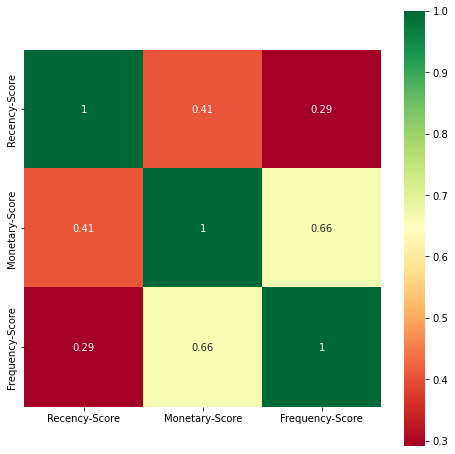

In [14]:
correlation_matrix = X[['Recency-Score','Monetary-Score','Frequency-Score']].corr()
plt.figure(figsize=(8,8),facecolor='white')
sns.heatmap(correlation_matrix,square=True,annot=True,cmap="RdYlGn")

In [15]:
def elbow_method(data, columns):
    distortions = []
    inertias = []
    mapping1 = {}
    mapping2 = {}
    data_em = data[columns]
    K = range(1, 10)
 
    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(data_em)
        kmeanModel.fit(data_em)
     
        distortions.append(sum(np.min(cdist(data_em, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / data_em.shape[0])
        inertias.append(kmeanModel.inertia_)
 
        mapping1[k] = sum(np.min(cdist(data_em, kmeanModel.cluster_centers_,
                                       'euclidean'), axis=1)) / data_em.shape[0]
        mapping2[k] = kmeanModel.inertia_
        
    for key, val in mapping1.items():
        print(f'{key} : {val}')
        
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()
    
    for key, val in mapping2.items():
        print(f'{key} : {val}')
    
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method using Inertia')
    plt.show()

1 : 2.285486076523388
2 : 1.6541613483255673
3 : 1.4133958787990781
4 : 1.2530264871095493
5 : 1.1415232295313344
6 : 1.0561275403646473
7 : 1.010274198976537
8 : 0.9625552556152266
9 : 0.9297357268831808


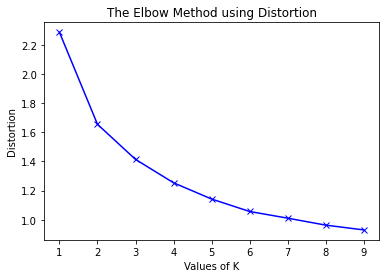

1 : 1752875.1142588672
2 : 938022.7488145841
3 : 679909.8982355376
4 : 535424.1902888969
5 : 438205.9531841337
6 : 380803.01101222256
7 : 342499.5990482606
8 : 314612.54011245223
9 : 290331.02221085574


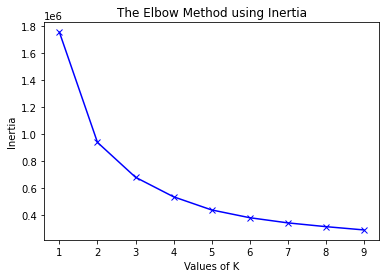

In [16]:
elbow_method(X,['Recency-Score','Monetary-Score','Frequency-Score'])

## **KMeans**

2 Clusters


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


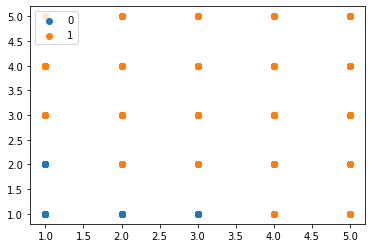

[0 0 0 ... 0 1 1]
3 Clusters


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


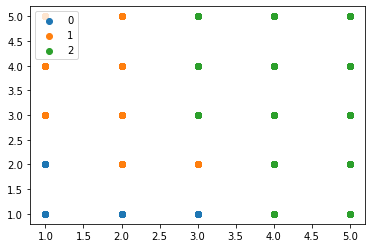

[0 2 2 ... 0 2 1]
4 Clusters


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


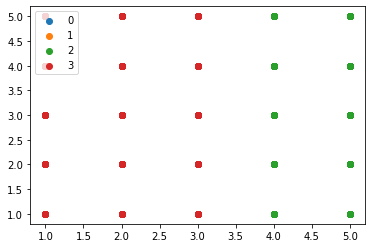

[1 2 2 ... 1 2 0]


In [17]:
clusters = [2,3,4]


for i in clusters:
  new_data = X[['Recency-Score','Monetary-Score','Frequency-Score']]
  print(f'{i} Clusters')
  kmeans = KMeans(n_clusters=i)
  labels = kmeans.fit_predict(new_data)
  #new_data['Clusters'] = labels
  u_labels = np.unique(labels)
  new_data = new_data.to_numpy()

  for j in u_labels:
    plt.scatter(new_data[labels == j,0],new_data[labels == j,1],label=j)
  plt.legend()
  plt.show()

  print(labels)

In [18]:
new_data

array([[1, 3, 1],
       [5, 3, 1],
       [5, 2, 1],
       ...,
       [2, 1, 1],
       [5, 4, 2],
       [3, 4, 4]])

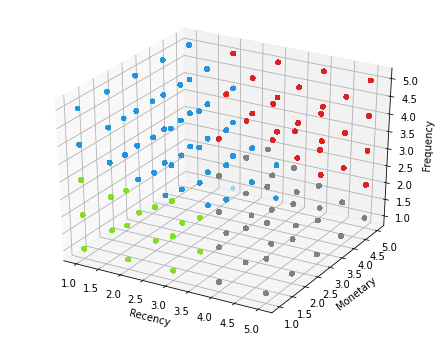

In [19]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

colors = ['#DF2020', '#81DF20', '#2095DF','grey']
kmeans = KMeans(n_clusters=4, random_state=0)
X['cluster'] = kmeans.fit_predict(X[['Recency-Score','Monetary-Score','Frequency-Score']])
X['c'] = X.cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X['Recency-Score'], X['Monetary-Score'], X['Frequency-Score'], c=X.c, s=15)
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency')
plt.show()

In [20]:
new_df = X[['Recency-Score','Monetary-Score','Frequency-Score','c']]
new_df['cluster'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
new_df['cluster'].unique()

array([1, 2, 0, 3], dtype=int32)

In [22]:
new_df[new_df.cluster == 0].values

array([[5, 5, 2, '#DF2020', 0],
       [5, 5, 2, '#DF2020', 0],
       [4, 5, 4, '#DF2020', 0],
       ...,
       [4, 5, 4, '#DF2020', 0],
       [4, 4, 3, '#DF2020', 0],
       [3, 4, 4, '#DF2020', 0]], dtype=object)

# **Modelos**

# **Datos Crudos**

* Incluye outliers

* Frequency Score: [1 - 5]

* Recency Score: [1 - 5]

* Monerary Score: [1 - 5]


In [24]:
df = pd.read_csv('/content/drive/MyDrive/Datos_GDC/ModeloRFMBrilla_BaseRFM.csv')
df['Identificacion'] = df['Identificacion'].astype(int)
df = df.drop('#',axis=1)

In [31]:
import time

start = time.time()
X = pd.DataFrame(modelo1(df))
end = time.time()
print(end - start)

5.356117248535156


In [32]:
X.isna().sum()

Identificacion     0
Recency            0
Frequency          0
Monetary           0
Recency-Score      0
Monetary-Score     0
Frequency-Score    0
dtype: int64

In [36]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
def plot3d(X):
  colors = ['#DF2020', '#81DF20', '#2095DF','#F4D03F']
  kmeans = KMeans(n_clusters=4, random_state=0)
  X['cluster'] = kmeans.fit_predict(X[['Recency-Score','Monetary-Score','Frequency-Score']])
  X['c'] = X.cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3]})
  fig = plt.figure(figsize=(40,10))
  ax = fig.add_subplot(131, projection='3d')
  ax.scatter(X['Recency-Score'], X['Monetary-Score'], X['Frequency-Score'], c=X.c, s=15)
  ax.set_xlabel('Recency')
  ax.set_ylabel('Monetary')
  ax.set_zlabel('Frequency')

  #for angle in range(0, 360):
   # ax.view_init(30, angle)
   # plt.draw()
   # plt.pause(.001)
  plt.show()

  return X

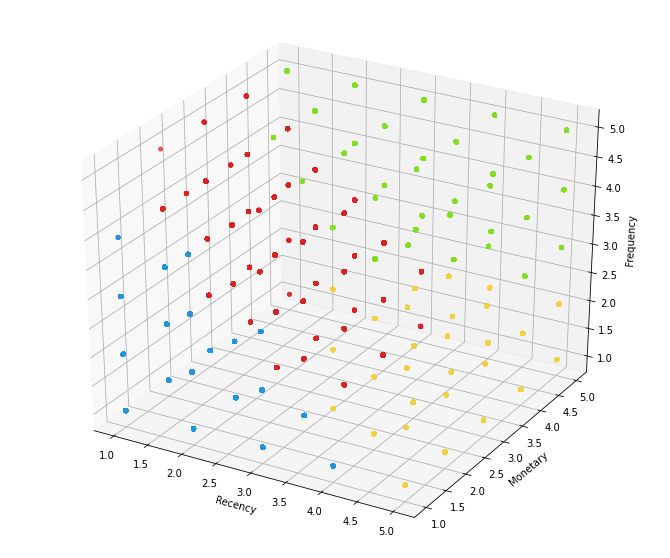

In [37]:
model1 = plot3d(X)

In [38]:
model1

,Identificacion,Recency,Frequency,Monetary,Recency-Score,Monetary-Score,Frequency-Score,cluster,c
0,1000249113,40,1,4550001,2,4,1,0,#DF2020
1,1001866958,4,1,4256000,5,4,1,3,#F4D03F
2,10002788,79,1,2000000,1,2,1,2,#2095DF
3,1001830554,4,1,2695000,5,3,1,3,#F4D03F
4,1001780906,3,2,7913737,5,5,2,3,#F4D03F
...,...,...,...,...,...,...,...,...,...
391681,968001,73,1,1102000,1,1,1,2,#2095DF
391682,98341215,33,1,1249000,3,1,1,2,#2095DF
391683,98341584,60,1,1378300,1,1,1,2,#2095DF
391684,98763614,5,2,6360000,5,5,2,3,#F4D03F


In [39]:
model1 = model1.drop('c',axis=1)
model1['cluster'] = model1['cluster'].replace({
    0:1,
    1:2,
    2:3,
    3:4
})

model1.head()

,Identificacion,Recency,Frequency,Monetary,Recency-Score,Monetary-Score,Frequency-Score,cluster
0,1000249113,40,1,4550001,2,4,1,1
1,1001866958,4,1,4256000,5,4,1,4
2,10002788,79,1,2000000,1,2,1,3
3,1001830554,4,1,2695000,5,3,1,4
4,1001780906,3,2,7913737,5,5,2,4


In [ ]:
model1 = model1.rename(columns={'cluster':'Grupo'})
model1.to_excel('Modelo1_RFM.xlsx')

# **Modelo 2**

* Recency: [1 - 49]

* Incluye outliers

* Frequency Score: [1 - 5]

* Recency Score: [1 - 5]

* Monerary Score: [1 - 5]

In [41]:
df = df[df['Recency'] <= 49]

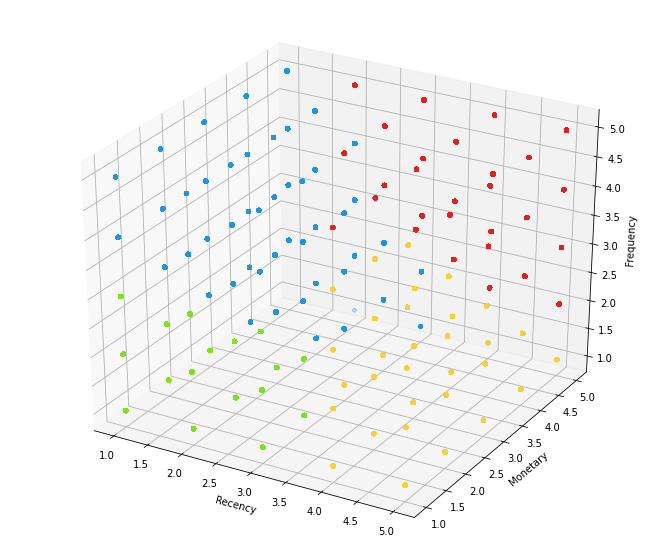

In [42]:
X = modelo1(df)
model2 = plot3d(X)

In [ ]:
model2 = model2.drop('c',axis=1)
model2['cluster'] = model2['cluster'].replace({
    0:1,
    1:2,
    2:3,
    3:4
})
model2 = model2.rename(columns={'cluster':'Grupo'})
model2.to_excel('Modelo2_RFM.xlsx')

model2.head()

# **Modelo 3**

* Sin outliers

* Recency: [1 - 49]

* Frequency Score: [1 - 5]

* Recency Score: [1 - 5]

* Monerary Score: [1 - 5]

In [44]:
df = df[df['Recency'] <= 49]

for i in ['Monetary','Frequency']:
  q_high = df[i].quantile(0.95)
  df = df[df[i] <= q_high]

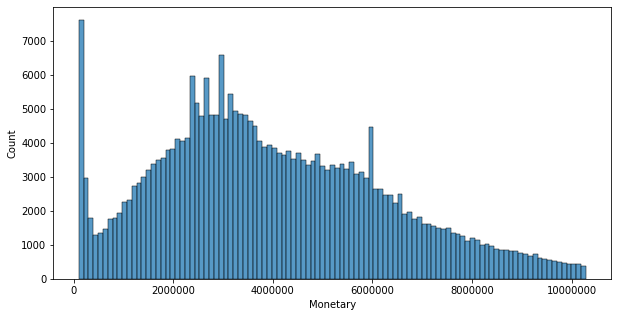

In [45]:
import seaborn as sns
plt.figure(figsize=(10,5))

sns.histplot(df['Monetary'])

plt.ticklabel_format(style='plain')

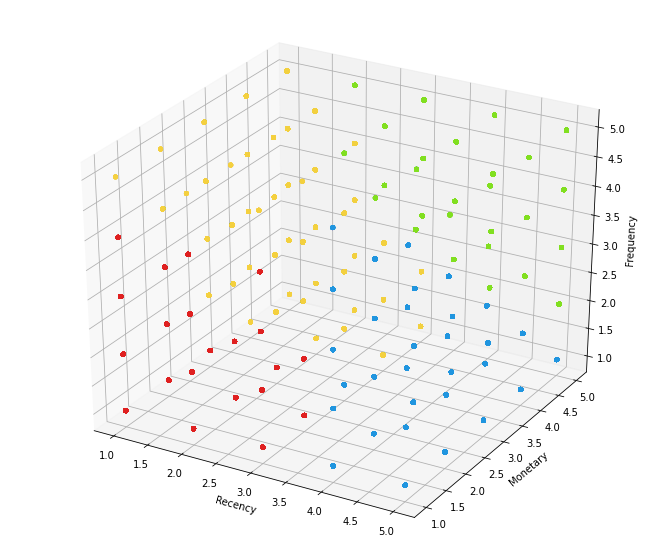

In [46]:
X = modelo1(df)
model3 = plot3d(X)

In [ ]:
model3 = model3.drop('c',axis=1)
model3['cluster'] = model3['cluster'].replace({
    0:1,
    1:2,
    2:3,
    3:4
})
model3 = model3.rename(columns={'cluster':'Grupo'})
model3.to_excel('Modelo3_RFM.xlsx')

model3.head()

,Identificacion,Recency,Frequency,Monetary,Recency-Score,Monetary-Score,Frequency-Score,Grupo
0,1000249113,40,1,4550001,1,4,1,4
1,1001866958,4,1,4256000,5,3,1,3
3,1001830554,4,1,2695000,5,2,1,3
4,1001780906,3,2,7913737,5,5,2,2
5,1000398945,5,1,2070000,5,2,1,3


# **Modelo 4**

* Incluye outliers

* Frequency Score: [1 - 4]

* Recency Score: [1 - 5]

* Monerary Score: [1 - 5]

In [47]:
df = pd.read_csv('/content/drive/MyDrive/Datos_GDC/ModeloRFMBrilla_BaseRFM.csv')
df['Identificacion'] = df['Identificacion'].astype(int)
df = df.drop('#',axis=1)

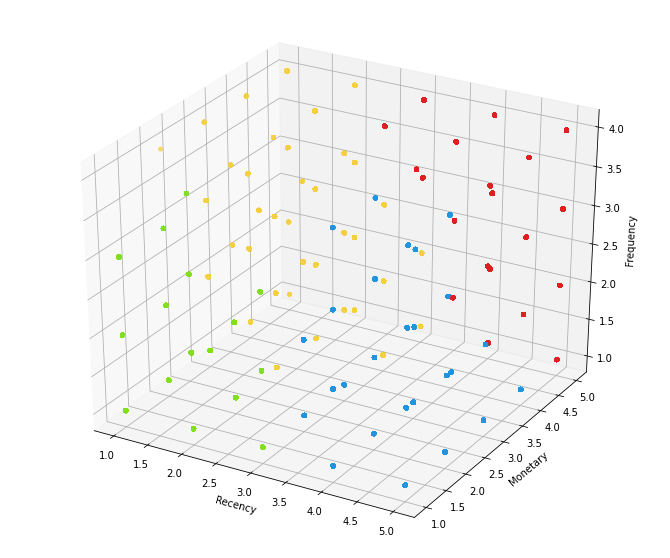

,Identificacion,Recency,Frequency,Monetary,Recency-Score,Monetary-Score,Frequency-Score,cluster,c
0,1000249113,40,1,4550001,2,4,1,3,#F4D03F
1,1001866958,4,1,4256000,5,4,1,2,#2095DF
2,10002788,79,1,2000000,1,2,1,1,#81DF20
3,1001830554,4,1,2695000,5,3,1,2,#2095DF
4,1001780906,3,2,7913737,5,5,2,0,#DF2020
...,...,...,...,...,...,...,...,...,...
391681,968001,73,1,1102000,1,1,1,1,#81DF20
391682,98341215,33,1,1249000,3,1,1,1,#81DF20
391683,98341584,60,1,1378300,1,1,1,1,#81DF20
391684,98763614,5,2,6360000,5,5,2,0,#DF2020


In [48]:
X = modelo4(df)
plot3d(X)

## **Modelo 5**

* Sin outliers

* Recency: [1 - 49]

* Frequency Score: [1 - 3]

* Recency Score: [1 - 5]

* Monerary Score: [1 - 5]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datos_GDC/ModeloRFMBrilla_BaseRFM.csv')
df['Identificacion'] = df['Identificacion'].astype(int)
df = df.drop('#',axis=1)

In [ ]:
df = df[df['Recency'] <= 49]

In [ ]:
for i in ['Monetary','Frequency']:
  q_high = df[i].quantile(0.95)
  df = df[df[i] <= q_high]

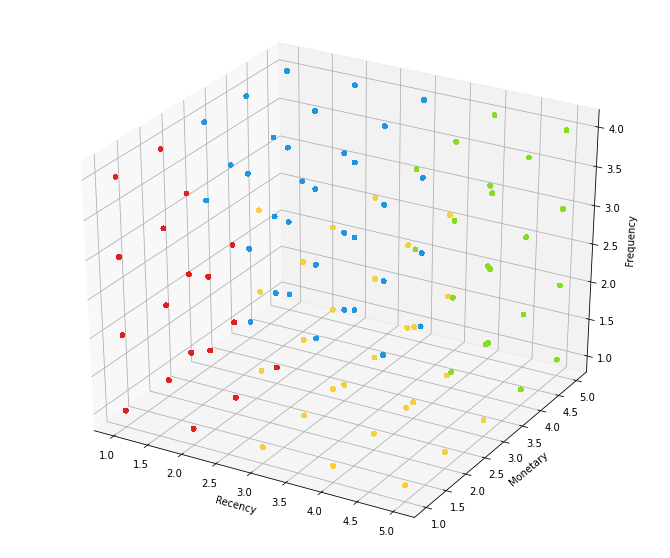

In [ ]:
X = modelo4(df)
plot3d(X)

In [ ]:
X_new = []

for i in X['Recency-Score'].unique():
  X_new.append(X[X['Recency-Score'] == i].head(1).index)


  for j in X['Frequency-Score'].unique():
    counter = 0
    while X[X['Frequency-Score'] == j].head(1).index not in X_new:
      X_new.append(X[X['Frequency-Score'] == j].head(1).index)
      



    for v in X['Monetary-Score'].unique():
      X_new.append(X[X['Monetary-Score'] == v].head(1).index)

In [ ]:
X['New_RFM'] = X[['Recency-Score', 'Frequency-Score', 'Monetary-Score']].astype(str).agg(''.join, axis=1)

In [ ]:
X.head()

,Identificacion,Recency,Frequency,Monetary,Recency-Score,Monetary-Score,Frequency-Score,cluster,c,New_RFM
0,1000249113,40,1,4550001,2,4,1,0,#DF2020,214
1,1001866958,4,1,4256000,5,4,1,3,#F4D03F,514
2,10002788,79,1,2000000,1,2,1,2,#2095DF,112
3,1001830554,4,1,2695000,5,3,1,3,#F4D03F,513
4,1001780906,3,2,7913737,5,5,2,3,#F4D03F,525


In [ ]:
new_X = []
for i in X['New_RFM'].unique():
  new_X.append(X[X['New_RFM'] == i].head(1).index.values)

In [ ]:
new_X = [int(str(x)[1:-1]) for x in new_X]

In [ ]:
X.iloc[new_X]

,Identificacion,Recency,Frequency,Monetary,Recency-Score,Monetary-Score,Frequency-Score,cluster,c,New_RFM
0,1000249113,40,1,4550001,2,4,1,0,#DF2020,214
1,1001866958,4,1,4256000,5,4,1,3,#F4D03F,514
2,10002788,79,1,2000000,1,2,1,2,#2095DF,112
3,1001830554,4,1,2695000,5,3,1,3,#F4D03F,513
4,1001780906,3,2,7913737,5,5,2,3,#F4D03F,525
...,...,...,...,...,...,...,...,...,...,...
61666,1771720,16,6,748998,4,1,5,1,#81DF20,451
64861,22305316,37,6,1583196,2,2,5,0,#DF2020,252
75077,22384145,56,4,1137000,1,1,4,2,#2095DF,141
84462,22431502,80,1,7200000,1,5,1,0,#DF2020,115
